Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Matplotlib is building the font cache; this may take a moment.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [5]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

PHI = PolynomialFeatures(degree=1, include_bias=True).fit_transform(X)
print(PHI)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

w = linalg.inv(PHI.T @ PHI) @ PHI.T @ y
print("Weights using normal equation:")
print(w)
w = linalg.pinv(PHI) @ y
print("Weights using pseudoinverse:")
print(w)

Weights using normal equation:
[2.2        0.45714286]
Weights using pseudoinverse:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error

X_tilda = np.insert(X, 0, 1)

def h(w, x): # this is implemented in mean_squared_error function
    return np.dot(w.T, x)

predictions = PHI @ w
mse = mean_squared_error(y, predictions)
learning_error = mse * len(y) / 2

print("Predictions:", predictions)
print("Mean squared error:", mse)
print("Learning error:", learning_error)

Predictions: [2.2        2.65714286 3.11428571 4.02857143]
Mean squared error: 2.042857142857143
Learning error: 4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    w = linalg.inv(PHI) @ y
except linalg.LinAlgError:
    print("Matrix PHI is not invertible")

example_matrix = np.array([
    [1, 2, 2, 5],
    [1, 4, 6, 11],
    [1, 7, 9, 17],
    [1, 8, 10, 19]
])

rank = np.linalg.matrix_rank(example_matrix)
print(f"Rank of example_matrix: {rank}")

try:
    w = linalg.inv(example_matrix) @ y
except linalg.LinAlgError:
    print("Matrix example_matrix is not invertible")

Matrix PHI is not invertible
Rank of example_matrix: 3
Matrix example_matrix is not invertible


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)
print("Predicitions: ", lr.predict(X))

mse = mean_squared_error(y, lr.predict(X))
learning_error = mse * len(y) / 2

print("Mean squared error:", mse)
print("Learning error:", learning_error)

Coefficient:  [0.45714286]
Intercept:  2.2
Predicitions:  [2.2        2.65714286 3.11428571 4.02857143]
Mean squared error: 2.042857142857143
Learning error: 4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    y_true = f(X)
    noise = normal(0, noise, size=y_true.shape)
    y = y_true + noise
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
X = make_instances(-5, 5, 50)
f = lambda x: 5 + x - 2 * x**2 - 5 * x**3
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

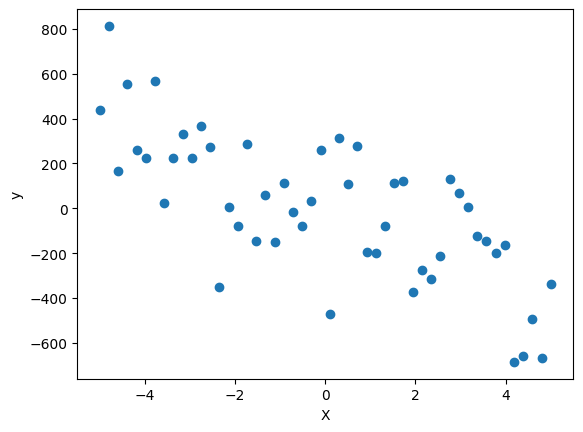

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

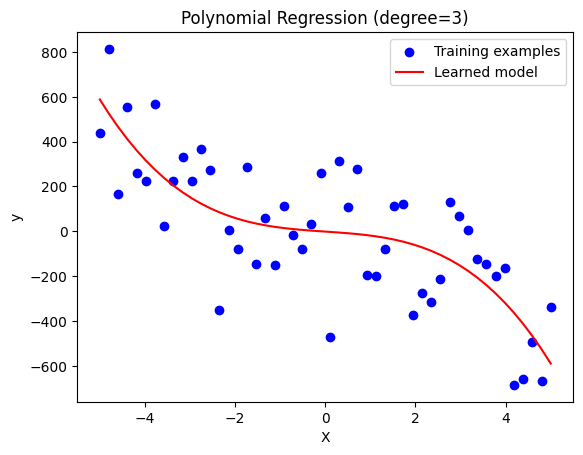

MSE: 41746.976483356506


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# i have to fit before transforming because it has to learn
# the neccessary parameters for transformation
X_poly = PolynomialFeatures(degree=3).fit_transform(X) # feature mapping
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)

plt.scatter(X, y, color='blue', label='Training examples')
plt.plot(X, y_pred, color='red', label='Learned model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (degree=3)')
plt.legend()
plt.show()

print("MSE:", mse)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

C:\Users\avukovic\AppData\Local\Temp\ipykernel_10496\1036659649.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(degrees))


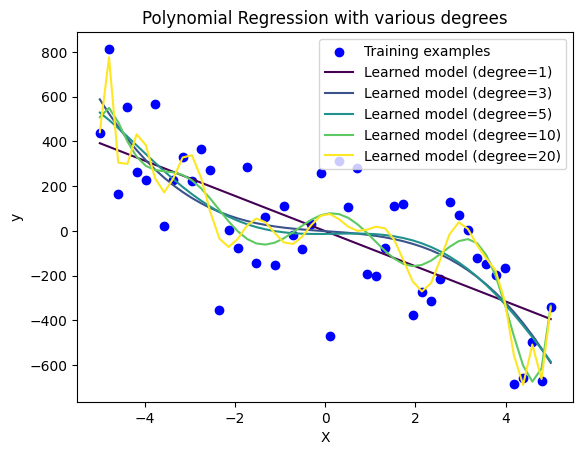

MSE (degree=1) = 48710.40722496279
MSE (degree=3) = 41746.976483356506
MSE (degree=5) = 41454.34079615518
MSE (degree=10) = 34230.02190345121
MSE (degree=20) = 27646.742443219064


In [13]:
from matplotlib import cm

degrees = [1, 3, 5, 10, 20]
colormap = cm.get_cmap('viridis', len(degrees))
mse_values = []

plt.scatter(X, y, color='blue', label='Training examples')

for i, degree in enumerate(degrees):
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    color = colormap(i / len(degrees))
    plt.plot(X, y_pred, color=color, label=f'Learned model (degree={degree})')

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with various degrees')
plt.legend()
plt.show()

for mse, degree in zip(mse_values, degrees):
    print(f"MSE (degree={degree}) = {mse}")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

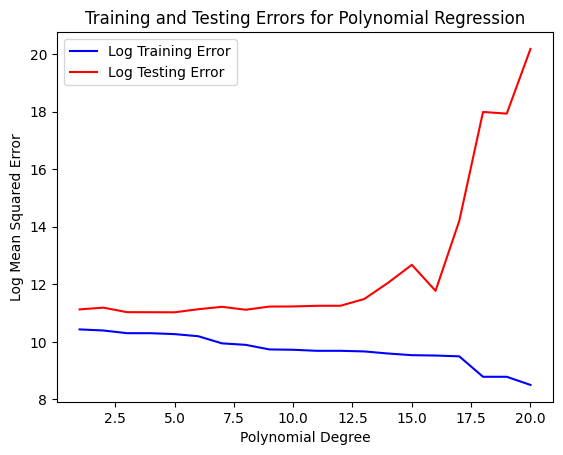

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

degrees = range(1, 21)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test) # using weights from training set
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(np.log(train_error))
    test_errors.append(np.log(test_error))

plt.plot(degrees, train_errors, label='Log Training Error', color='blue')
plt.plot(degrees, test_errors, label='Log Testing Error', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Log Mean Squared Error')
plt.title('Training and Testing Errors for Polynomial Regression')
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

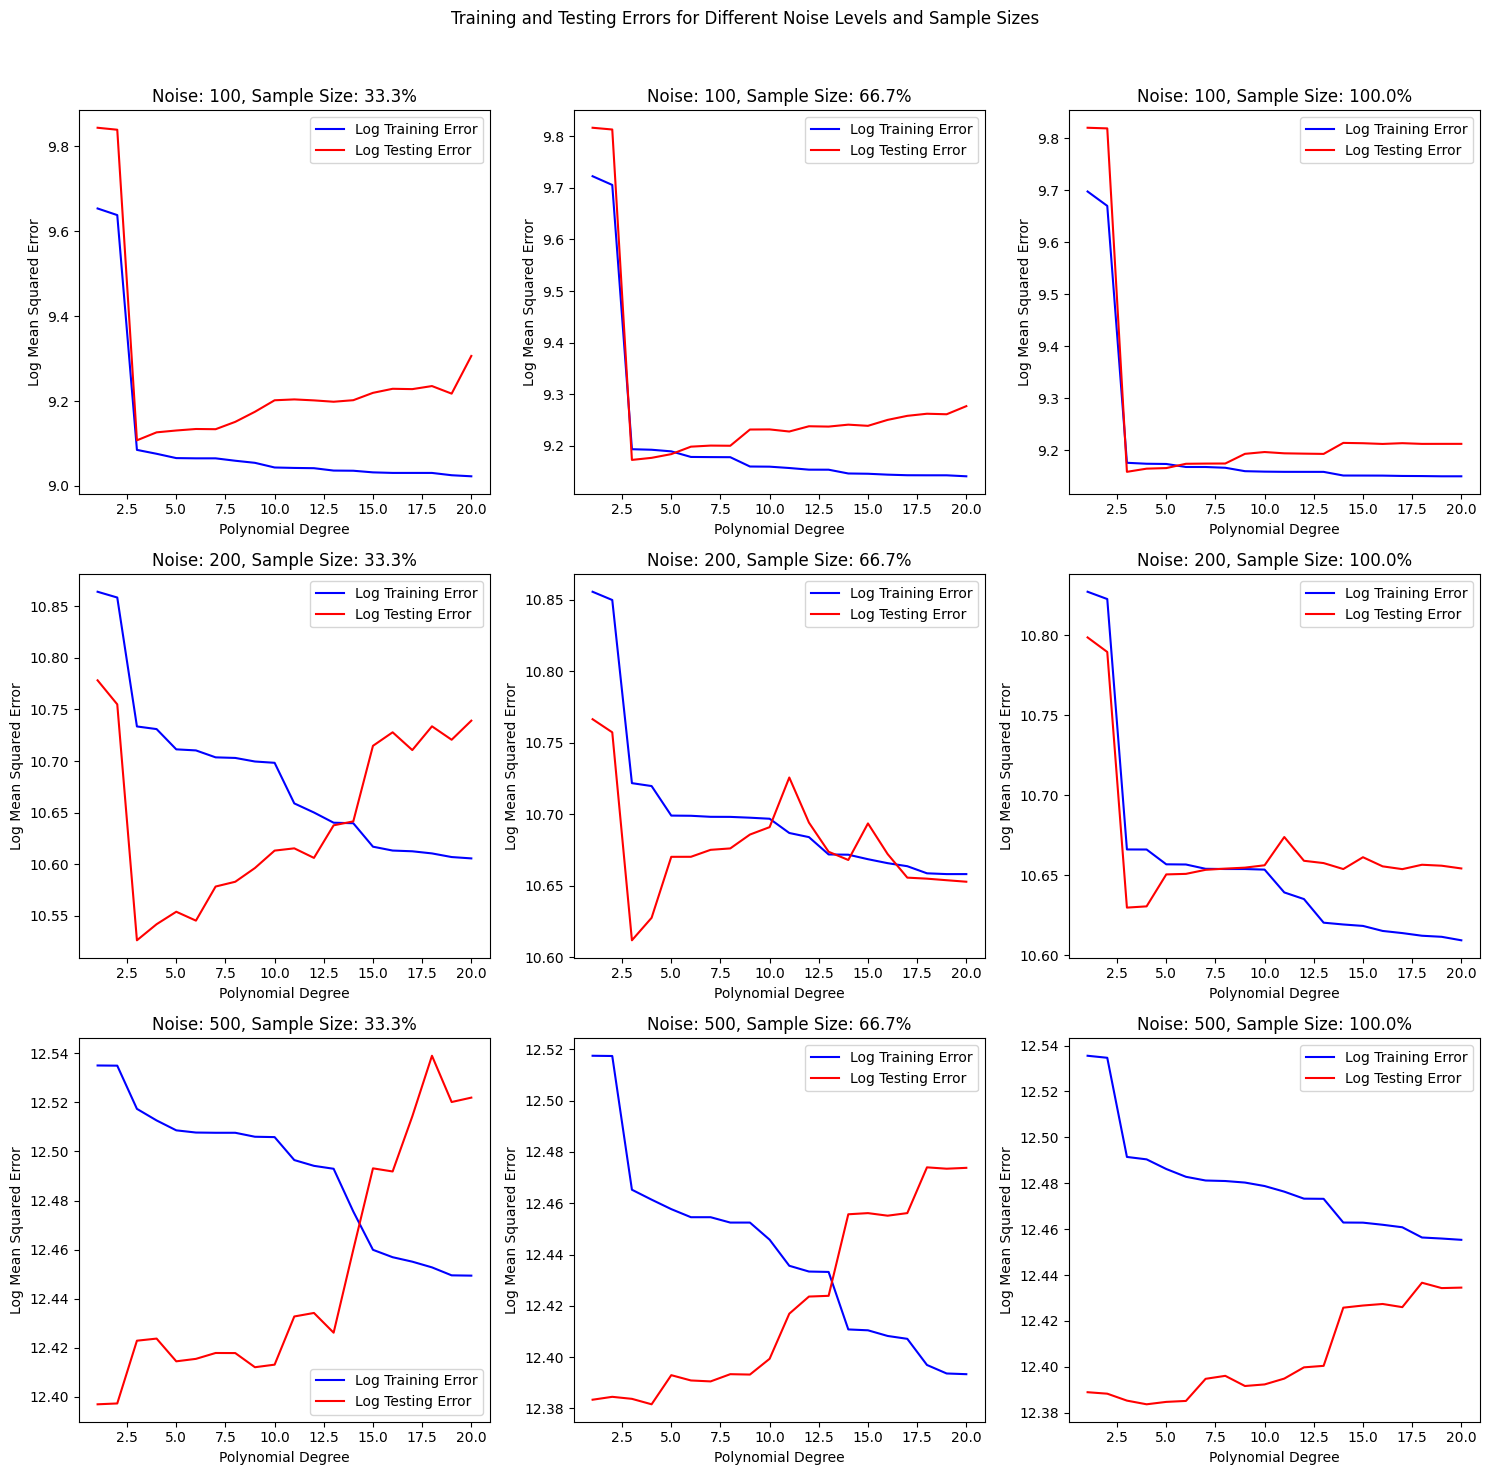

In [15]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

noise_levels = [100, 200, 500]
sample_sizes = [1/3, 2/3, 1]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Training and Testing Errors for Different Noise Levels and Sample Sizes')

for i, noise in enumerate(noise_levels):
    y_train = make_labels(X_train, f, noise)
    y_test = make_labels(X_test, f, noise)
    for j, sample_size in enumerate(sample_sizes):
        sample_idx_train = np.random.choice(len(X_train), int(sample_size * len(X_train)), replace=False)
        sample_idx_test = np.random.choice(len(X_test), int(sample_size * len(X_test)), replace=False)
        
        X_train_sample = X_train[sample_idx_train]
        y_train_sample = y_train[sample_idx_train]
        X_test_sample = X_test[sample_idx_test]
        y_test_sample = y_test[sample_idx_test]
        
        degrees = range(1, 21)
        train_errors = []
        test_errors = []
        
        for degree in degrees:
            poly = PolynomialFeatures(degree=degree)
            X_train_poly = poly.fit_transform(X_train_sample)
            X_test_poly = poly.transform(X_test_sample)
            
            model = LinearRegression()
            model.fit(X_train_poly, y_train_sample)
            
            y_train_pred = model.predict(X_train_poly)
            y_test_pred = model.predict(X_test_poly)
            
            train_error = mean_squared_error(y_train_sample, y_train_pred)
            test_error = mean_squared_error(y_test_sample, y_test_pred)
            
            train_errors.append(np.log(train_error))
            test_errors.append(np.log(test_error))
        
        ax = axes[i, j]
        ax.plot(degrees, train_errors, label='Log Training Error', color='blue')
        ax.plot(degrees, test_errors, label='Log Testing Error', color='red')
        ax.set_xlabel('Polynomial Degree')
        ax.set_ylabel('Log Mean Squared Error')
        ax.set_title(f'Noise: {noise}, Sample Size: {sample_size*100:.1f}%')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

poly = PolynomialFeatures(degree=3, include_bias=True)
PHI = poly.fit_transform(X)

def ridge_regression(PHI, y, lambda_):
    I = np.eye(PHI.shape[1])
    I[0, 0] = 0 # do not regularize the bias term
    w = np.linalg.inv(PHI.T @ PHI + lambda_ * I) @ PHI.T @ y
    return w

lambdas = [0, 1, 10]
for lambda_ in lambdas:
    print(f"Weights for lambda={lambda_}: {ridge_regression(PHI, y, lambda_)}")

matrix_dim = PHI.T @ PHI + lambdas[0] * np.eye(PHI.shape[1])
print(f"Dimensions of the matrix to be inverted: {matrix_dim.shape}")

Weights for lambda=0: [ 4.         -5.91666667  3.375      -0.45833333]
Weights for lambda=1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Weights for lambda=10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
Dimensions of the matrix to be inverted: (4, 4)


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge

for lambda_ in lambdas:
    model = Ridge(alpha=lambda_, fit_intercept=True)
    model.fit(PHI[:, 1:], y)
    print(f"Weights for lambda={lambda_}: {model.coef_}")
    print(f"Intercept for lambda={lambda_}: {model.intercept_}")

Weights for lambda=0: [-5.91666667  3.375      -0.45833333]
Intercept for lambda=0: 3.9999999999999574
Weights for lambda=1: [-0.69079365 -0.2831746   0.1445805 ]
Intercept for lambda=1: 3.0569614512471652
Weights for lambda=10: [-0.15897295 -0.13423067  0.0815601 ]
Intercept for lambda=10: 2.494441843122973


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

Number of features for degree=2: 2
Number of features for degree=10: 10


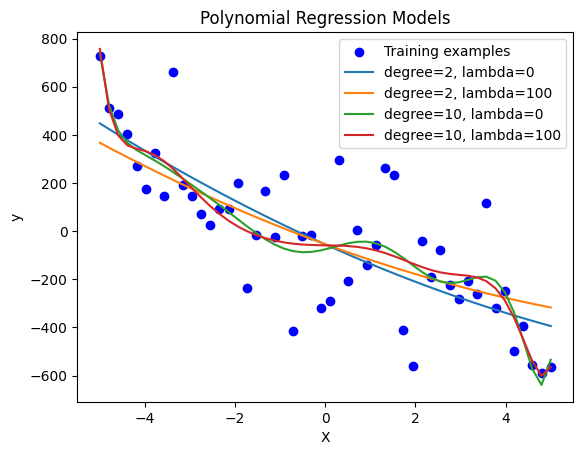

In [18]:
lambdas = [0, 100]
degrees = [2, 10]
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

plt.scatter(X, y, color='blue', label='Training examples')

for degree in degrees:
    X_poly = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X) # feature mapping
    # X_poly doesn't have bias terms which is good
    print(f"Number of features for degree={degree}: {X_poly.shape[1]}")
    for lambda_ in lambdas:
        model = Ridge(alpha=lambda_, fit_intercept=True)
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(X, y_pred, label=f'degree={degree}, lambda={lambda_}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Models')
plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


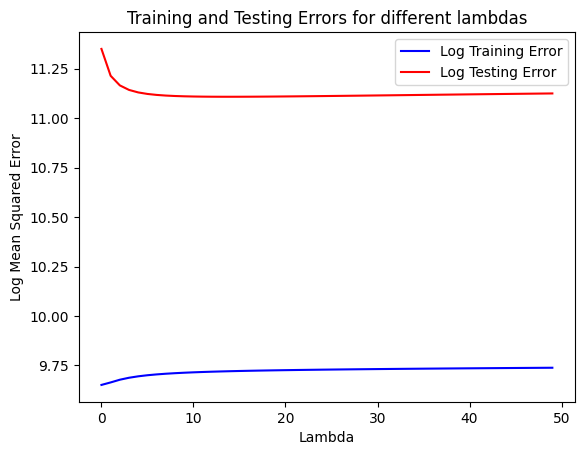

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lambdas = range(0, 50)

poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

train_errors = []
test_errors = []

for lambda_ in lambdas:
    model = Ridge(alpha=lambda_, fit_intercept=True)
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(np.log(train_error))
    test_errors.append(np.log(test_error))

plt.plot(lambdas, train_errors, label='Log Training Error', color='blue')
plt.plot(lambdas, test_errors, label='Log Testing Error', color='red')
plt.xlabel('Lambda')
plt.ylabel('Log Mean Squared Error')
plt.title('Training and Testing Errors for different lambdas')
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

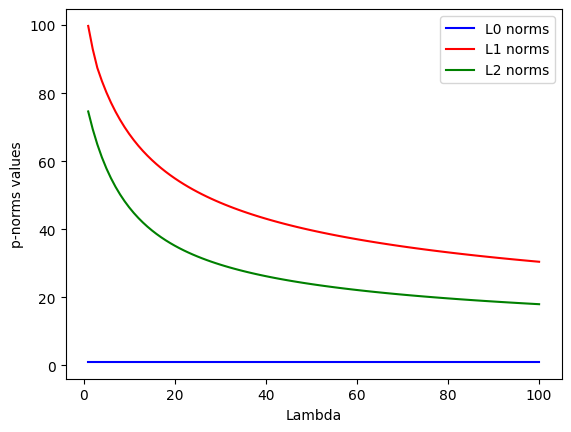

In [21]:
from sklearn.linear_model import Ridge

lambdas = range(1, 101)
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

l0_norms = []
l1_norms = []
l2_norms = []

for lambda_ in lambdas:
    model = Ridge(alpha=lambda_, fit_intercept=True)
    model.fit(X_train_poly, y_train)
    
    l0_norm = nonzeroes(model.coef_) 
    l1_norm = np.sum(np.abs(model.coef_))
    # l1_norm = np.linalg.norm(model.coef_, 1)
    l2_norm = np.sqrt(np.sum(model.coef_**2))
    # l2_norm = np.linalg.norm(model.coef_, 2)

    l0_norms.append(l0_norm)
    l1_norms.append(l1_norm)
    l2_norms.append(l2_norm)

plt.plot(lambdas, l0_norms, label='L0 norms', color='blue')
plt.plot(lambdas, l1_norms, label='L1 norms', color='red')
plt.plot(lambdas, l2_norms, label='L2 norms', color='green')
plt.xlabel('Lambda')
plt.ylabel('p-norms values')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

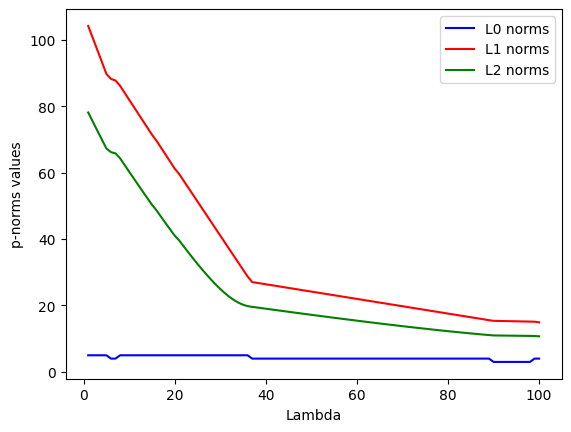

In [22]:
from sklearn.linear_model import Lasso

lambdas = range(1, 101)
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

l0_norms = []
l1_norms = []
l2_norms = []

for lambda_ in lambdas:
    model = Lasso(alpha=lambda_, fit_intercept=True)
    model.fit(X_train_poly, y_train)
    
    l0_norm = nonzeroes(model.coef_) 
    l1_norm = np.sum(np.abs(model.coef_))
    l2_norm = np.sqrt(np.sum(model.coef_**2))

    l0_norms.append(l0_norm)
    l1_norms.append(l1_norm)
    l2_norms.append(l2_norm)

plt.plot(lambdas, l0_norms, label='L0 norms', color='blue')
plt.plot(lambdas, l1_norms, label='L1 norms', color='red')
plt.plot(lambdas, l2_norms, label='L2 norms', color='green')
plt.xlabel('Lambda')
plt.ylabel('p-norms values')
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

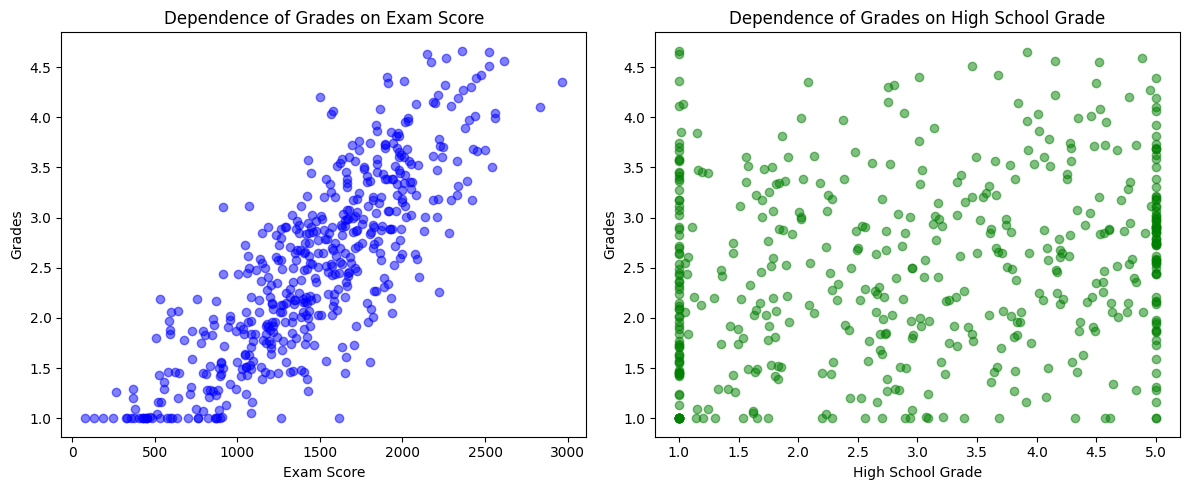

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(exam_score, grades_y, color='blue', alpha=0.5)
plt.xlabel('Exam Score')
plt.ylabel('Grades')
plt.title('Dependence of Grades on Exam Score')

plt.subplot(1, 2, 2)
plt.scatter(grade_in_highschool, grades_y, color='green', alpha=0.5)
plt.xlabel('High School Grade')
plt.ylabel('Grades')
plt.title('Dependence of Grades on High School Grade')

plt.tight_layout()
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(grades_X, grades_y)

grades_y_pred = ridge_model.predict(grades_X)
print("Weights:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean squared error:", mean_squared_error(grades_y, grades_y_pred))

Weights: [0.00141497 0.09477276]
Intercept: 0.15061179575775974
Mean squared error: 0.23990435033172805


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [32]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

grades_X_fixed = scaler_X.fit_transform(grades_X)
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

ridge_model = Ridge(alpha=0.01)
ridge_model.fit(grades_X_fixed, grades_y_fixed)

grades_y_fixed_pred = ridge_model.predict(grades_X_fixed)
# grades_y_pred = scaler_y.inverse_transform(grades_y_fixed_pred) # reverse the scaling

print("Weights:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean squared error:", mean_squared_error(grades_y_fixed, grades_y_fixed_pred))

Weights: [[0.81630375 0.15167761]]
Intercept: [8.62551331e-17]
Mean squared error: 0.29228757017069595


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_X_fixed[:, -1].reshape(-1, 1)])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(grades_X_fixed_colinear, grades_y_fixed)

grades_y_fixed_pred = ridge_model.predict(grades_X_fixed_colinear)
# grades_y_pred = scaler_y.inverse_transform(grades_y_fixed_pred) # reverse the scaling

print("Weights:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean squared error:", mean_squared_error(grades_y_fixed, grades_y_fixed_pred))

Weights: [[0.81630364 0.07583957 0.07583957]]
Intercept: [8.6255971e-17]
Mean squared error: 0.2922875701674416


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
lambdas = [0.01, 1000]
num_iterations = 10
sample_size = int(0.5 * grades_X_fixed_colinear.shape[0])

weights_lambda_0_01 = []
weights_lambda_1000 = []

for _ in range(num_iterations):
    indices = np.random.choice(grades_X_fixed_colinear.shape[0], sample_size, replace=False)
    X_sample = grades_X_fixed_colinear[indices]
    y_sample = grades_y_fixed[indices]
    
    model_0_01 = Ridge(alpha=0.01, fit_intercept=False)
    model_0_01.fit(X_sample, y_sample)
    weights_lambda_0_01.append(model_0_01.coef_.flatten())
    
    model_1000 = Ridge(alpha=1000, fit_intercept=False)
    model_1000.fit(X_sample, y_sample)
    weights_lambda_1000.append(model_1000.coef_.flatten())

weights_lambda_0_01 = np.array(weights_lambda_0_01)
weights_lambda_1000 = np.array(weights_lambda_1000)

std_dev_lambda_0_01 = np.std(weights_lambda_0_01, axis=0)
std_dev_lambda_1000 = np.std(weights_lambda_1000, axis=0)

print("Weights for lambda=0.01 in 10 iterations:")
print(weights_lambda_0_01)
print("\nStandard deviation of weights for lambda=0.01:")
print(std_dev_lambda_0_01)

print("\nWeights for lambda=1000 in 10 iterations:")
print(weights_lambda_1000)
print("\nStandard deviation of weights for lambda=1000:")
print(std_dev_lambda_1000)

Weights for lambda=0.01 in 10 iterations:
[[0.84360487 0.08914783 0.08914783]
 [0.82513709 0.07457771 0.07457771]
 [0.81928627 0.0744932  0.0744932 ]
 [0.79956478 0.07669912 0.07669912]
 [0.83735178 0.06951647 0.06951647]
 [0.82471933 0.10881972 0.10881972]
 [0.82752958 0.08879969 0.08879969]
 [0.82014066 0.08571889 0.08571889]
 [0.81084602 0.10927668 0.10927668]
 [0.81198544 0.0772065  0.0772065 ]]

Standard deviation of weights for lambda=0.01:
[0.01220295 0.01332473 0.01332473]

Weights for lambda=1000 in 10 iterations:
[[0.16428592 0.02828569 0.02828569]
 [0.16844418 0.04214177 0.04214177]
 [0.1671079  0.03966165 0.03966165]
 [0.16278512 0.03255976 0.03255976]
 [0.17126225 0.03992737 0.03992737]
 [0.15011424 0.03447599 0.03447599]
 [0.17274447 0.0436361  0.0436361 ]
 [0.1671892  0.03584621 0.03584621]
 [0.16147038 0.04996911 0.04996911]
 [0.1620668  0.03554937 0.03554937]]

Standard deviation of weights for lambda=1000:
[0.00606395 0.00587589 0.00587589]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.  